In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [107]:
data = pd.read_csv('/Users/rathan/Desktop/Projects/Diabetes_project/Dataset/diabetes.csv')

In [108]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [110]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())
data['Pregnancies'] = data['Pregnancies'].replace(0, data['Pregnancies'].mean())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())

from the description the each feature we observe that min value is Zero, glucose, Bloodpressure and other can't zero, then we have to replace the values zero to mean() of that column

If the the data contains with the outliers then we replace with median


<Axes: >

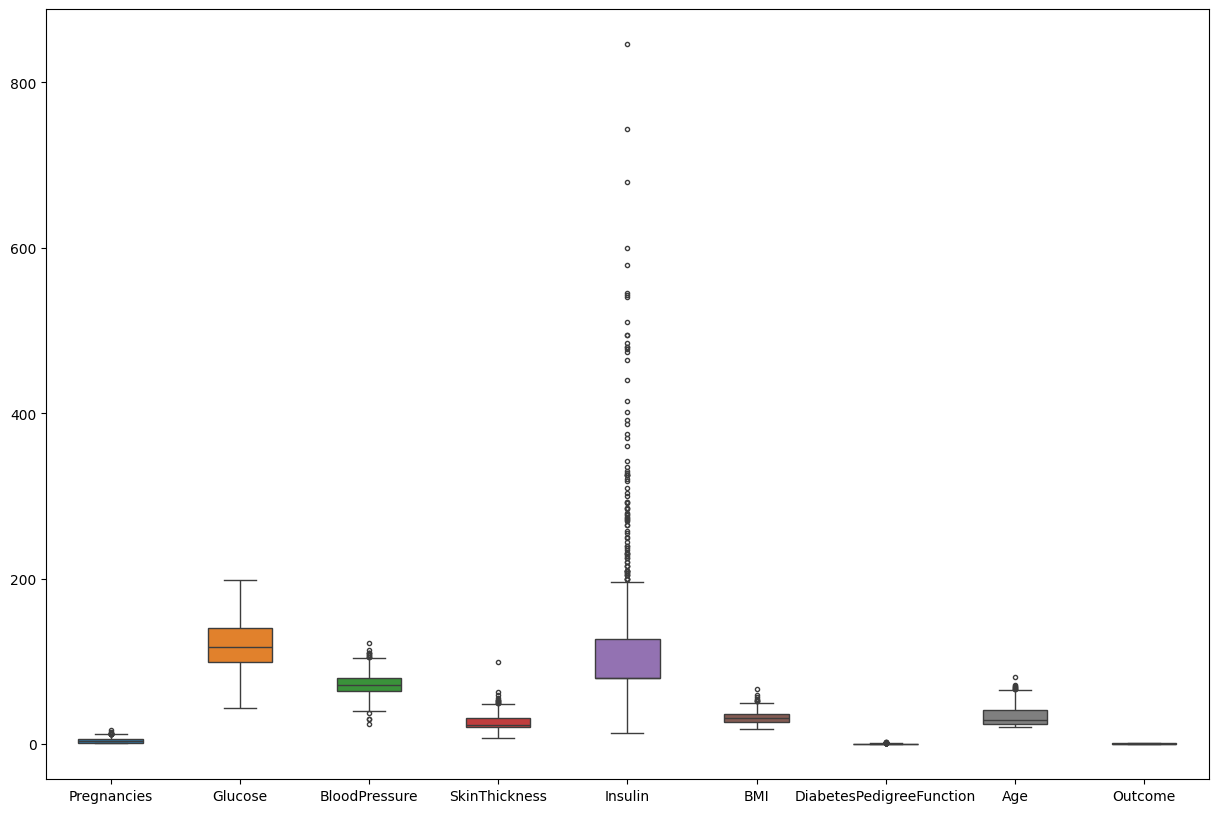

In [111]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=data, ax=ax, width=0.5, fliersize=3)

###### we can observe that The Insulin feature have lot of outliers, to solve this we divide the data into the train and test apply the standardscaler.

# independent and dependent variables 

In [112]:
X = data.drop(['Outcome'], axis=1)
y = data[['Outcome']]

In [113]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [114]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614, 1), (154, 1))

In [116]:
import pickle
## standardscaler - (standardization)
from sklearn.preprocessing import StandardScaler
def standardization(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    file = open('/Users/rathan/Desktop/Projects/Diabetes_project/Model/standardscaler.pkl','wb')
    pickle.dump(scaler, file)
    file.close()
    
    
    return X_train_scaled, X_test_scaled

In [117]:
X_train_scaled, X_test_scaled = standardization(X_train, X_test)

In [118]:
X_train_scaled

array([[ 0.8359714 ,  0.93644016,  0.45816047, ...,  0.36864973,
         0.67740401,  1.69955804],
       [-0.1551076 , -0.81628595, -1.03864035, ..., -0.63292879,
        -0.07049698, -0.96569189],
       [-0.20629614,  1.43249471,  1.45602768, ...,  2.81536295,
        -0.11855487, -0.88240283],
       ...,
       [-0.1551076 , -0.91549686, -0.62286235, ..., -1.13371805,
        -0.95656442, -1.04898095],
       [ 2.15741006, -1.2131296 ,  0.12553806, ..., -0.36107176,
        -0.50001442,  0.11706589],
       [ 0.17525206,  0.4734559 ,  0.79078287, ..., -0.09027668,
         0.52121586,  2.94889395]])

In [119]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [120]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

## Hyperparametertuning

In [121]:
#GridsearchCV

parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-3, 3, 7),
    'solver' : ['newton-cg’', 'lbfgs', 'liblinear']
}

In [122]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg, 
                   param_grid = parameters,   # hyperparameters
                   scoring = 'accuracy',      # metrics for scoring
                   cv =10                     # cross validation
                  )

In [123]:
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg’', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [124]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [125]:
clf.best_score_

0.7621099947117926

In [126]:
y_pred = clf.predict(X_test_scaled)

## performance metrics

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [128]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[98,  9],
       [19, 28]])

In [129]:
true_positive = conf[0][0]
false_positive = conf[0][1]
false_negative = conf[1][0]
true_negative = conf[1][1]

In [130]:
## accuracy, precision, recall
accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)

In [131]:
accuracy

0.8181818181818182

In [132]:
precision

0.9158878504672897

In [133]:
recall

0.8376068376068376

In [134]:
# accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.8181818181818182

In [135]:
#f1_score
f1_score = 2*(precision * recall)/(precision + recall)
f1_score

0.875

In [136]:
# classification_report
clas_report = classification_report(y_test, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [137]:
file = open('modelforprediction.pkl','wb')
pickle.dump(log_reg, file)
file.close()